<a href="https://colab.research.google.com/github/DaHyeonnn/poison-mushroom/blob/main/Stretch_dataset_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 코랩에서 kaggle dataset 사용하는 방법
[https://soohee410.github.io/colab_kaggle](https://soohee410.github.io/colab_kaggle)

[https://kubig-2021-2.tistory.com/35](https://kubig-2021-2.tistory.com/35)

In [1]:
# kaggle 설치
!pip install kaggle
from google.colab import files
files.upload() # kaggle.json 업로드

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ekgus8742","key":"09036d39123e92dd92099de94d3cc004"}'}

In [2]:
ls -1ha kaggle.json

kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# 데이터셋 다운로드
!kaggle datasets download -d harperd17/mushroom-pictures

 82% 46.0M/56.1M [00:00<00:00, 173MB/s] 
100% 56.1M/56.1M [00:00<00:00, 134MB/s]


In [6]:
!ls

kaggle.json  mushroom-pictures.zip  sample_data


In [7]:
# 데이터셋 압축 해제
!unzip mushroom-pictures.zip

Archive:  mushroom-pictures.zip
  inflating: All_Mushroom_Data/Amanita bisporigera/100598.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100599.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100600.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100626.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100628.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100629.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100630.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100631.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101388.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101389.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101528.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101529.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101751.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101752.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101753.jpg  
  inflat

In [8]:
!pwd

/content


In [9]:
!ls

All_Mushroom_Data  kaggle.json	mushroom-pictures.zip  sample_data


In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn # 손실, 활성화 함수, 신경망 생성을 위한 풀링 함수 포함
from torch import optim # optimizer
import torch.nn.functional as F
from torchvision import datasets, transforms, models

from torchvision import transforms
from torchvision import datasets

In [13]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
# pre-trained model 불러오기
# 이미지 분류 문제를 해결할 수 있도록 규모가 큰 데이터로 미리 학습된 모델
model = models.resnet152(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
for param in model.parameters():
    param.requires_grad = False

# 순서를 갖는 모듈의 컨테이너
# 정의된 것과 같은 순서로 모든 모듈들을 통해 전달 -> 신경망을 빠르게 제작
# 참고: https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html    
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),
                                 nn.Linear(512, 12),
                                 nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.01)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [17]:
import os
from os import path
import glob

In [18]:
####데이터 알규먼트
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [19]:
###All_Mushroom_Data 폴더명 변경해주기
mushrooms = ['Amanita_bisporigera', 'Amanita_muscaria', 'Boletus_edulis', 'Cantharellus', 'Omphalotus_olearius', 'Russula_mariae']
path = '/content/All_Mushroom_Data'
Amanita_bisporigera = glob.glob(path+'/Amanita_bisporigera'+'/*')
Amanita_muscaria = glob.glob(path+'/Amanita_muscaria'+'/*')
Boletus_edulis = glob.glob(path+'/Boletus_edulis'+'/*')
Cantharellus = glob.glob(path+'/Cantharellus'+'/*')
Omphalotus_olearius = glob.glob(path+'/Omphalotus_olearius'+'/*')
Russula_mariae = glob.glob(path+'/Russula_mariae'+'/*')

In [20]:
# 원본
sum = 0
for elem in mushrooms:
  print(f'{elem} 이미지 개수: {len(globals()[elem])}개')
  sum += len(globals()[elem])
print(f'총 이미지 개수: {sum}')

Amanita_bisporigera 이미지 개수: 606개
Amanita_muscaria 이미지 개수: 367개
Boletus_edulis 이미지 개수: 444개
Cantharellus 이미지 개수: 1183개
Omphalotus_olearius 이미지 개수: 59개
Russula_mariae 이미지 개수: 235개
총 이미지 개수: 2894


In [ ]:
# # 추후 new_mushroom을 train, test로 나누어주어야 함
# !mkdir new_mushroom
# %cd new_mushroom
# for mushroom in mushrooms:
#   os.mkdir(mushroom)

# 생성후 all 폴더에 다시 넣어주자

/content/new_mushroom/new_mushroom


In [21]:
print(globals()[mushrooms[0]])

['/content/All_Mushroom_Data/Amanita_bisporigera/462457.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/326472.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/256518.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/459512.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/428516.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/237964.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/52566.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/435667.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/101753.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/168221.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/107074.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/54840.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/264317.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/51902.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/352995.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/248852.jpg', '/content/All_Mushroom_Dat

In [22]:
print(len(mushrooms))

6


In [23]:
for elem in globals()[mushrooms[0][:100]]:
    img = load_img(elem)  # PIL 이미지
    x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
    x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열
    i = 0

    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='/content/All_Mushroom_Data/Amanita_bisporigera', save_prefix='1', save_format='jpeg'):

        i += 1
        if i > 0:
            break  # 이미지 100*1장을 생성하고 마칩니다

for elem in globals()[mushrooms[1]]:
    img = load_img(elem)  # PIL 이미지
    x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
    x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열
    i = 0

    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='/content/All_Mushroom_Data/Amanita_muscaria', save_prefix='1', save_format='jpeg'):

        i += 1
        if i > 1:
            break  # 이미지 전체*2장을 생성하고 마칩니다

for elem in globals()[mushrooms[2][:200]]:
    img = load_img(elem)  # PIL 이미지
    x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
    x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열
    i = 0

    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='/content/All_Mushroom_Data/Boletus_edulis', save_prefix='1', save_format='jpeg'):

        i += 1
        if i > 1:
            break  # 이미지 200*2장을 생성하고 마칩니다


for elem in globals()[mushrooms[4]]:
    img = load_img(elem)  # PIL 이미지
    x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
    x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열
    i = 0

    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='/content/All_Mushroom_Data/Omphalotus_olearius', save_prefix='1', save_format='jpeg'):

        i += 1
        if i > 9:
            break  # 이미지 전체 * 10장을 생성하고 마칩니다

for elem in globals()[mushrooms[5]]:
    img = load_img(elem)  # PIL 이미지
    x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
    x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열
    i = 0

    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='/content/All_Mushroom_Data/Russula_mariae', save_prefix='1', save_format='jpeg'):

        i += 1
        if i > 1:
            break  # 이미지 전체 * 2장을 생성하고 마칩니다

In [ ]:
# mushrooms = ['Amanita_bisporigera', 'Amanita_muscaria', 'Boletus_edulis', 'Cantharellus', 'Omphalotus_olearius', 'Russula_mariae']
# path = '/content/new_mushroom'
# Amanita_bisporigera = glob.glob(path+'/Amanita_bisporigera'+'/*')
# Amanita_muscaria = glob.glob(path+'/Amanita_muscaria'+'/*')
# Boletus_edulis = glob.glob(path+'/Boletus_edulis'+'/*')
# Cantharellus = glob.glob(path+'/Cantharellus'+'/*')
# Omphalotus_olearius = glob.glob(path+'/Omphalotus_olearius'+'/*')
# Russula_mariae = glob.glob(path+'/Russula_mariae'+'/*')

In [25]:
mushrooms = ['Amanita_bisporigera', 'Amanita_muscaria', 'Boletus_edulis', 'Cantharellus', 'Omphalotus_olearius', 'Russula_mariae']
path = '/content/All_Mushroom_Data'
Amanita_bisporigera = glob.glob(path+'/Amanita_bisporigera'+'/*')
Amanita_muscaria = glob.glob(path+'/Amanita_muscaria'+'/*')
Boletus_edulis = glob.glob(path+'/Boletus_edulis'+'/*')
Cantharellus = glob.glob(path+'/Cantharellus'+'/*')
Omphalotus_olearius = glob.glob(path+'/Omphalotus_olearius'+'/*')
Russula_mariae = glob.glob(path+'/Russula_mariae'+'/*')

In [26]:
# 늘린 데이터셋
sum = 0
for elem in mushrooms:
  print(f'{elem} 이미지 개수: {len(globals()[elem])}개')
  sum += len(globals()[elem])
print(f'총 이미지 개수: {sum}')

Amanita_bisporigera 이미지 개수: 1196개
Amanita_muscaria 이미지 개수: 1074개
Boletus_edulis 이미지 개수: 1294개
Cantharellus 이미지 개수: 1183개
Omphalotus_olearius 이미지 개수: 623개
Russula_mariae 이미지 개수: 699개
총 이미지 개수: 6069


In [ ]:
mushrooms = ['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Exidia', 'Hygrocybe', 'Inocybe', 'Lactarius', 'Pluteus', 'Russula', 'Suillus']
%cd /content/test
for mushroom in mushrooms:
  os.mkdir(mushroom)

In [30]:
test_ratio = 0.2
Amanita_bisporigera_test_count = round(len(Amanita_bisporigera)*test_ratio)
Amanita_muscaria_test_count = round(len(Amanita_muscaria)*test_ratio)
Boletus_edulis_test_count = round(len(Boletus_edulis)*test_ratio)
Cantharellus_test_count = round(len(Cantharellus)*test_ratio)
Omphalotus_olearius_test_count = round(len(Omphalotus_olearius)*test_ratio)
Russula_mariae_test_count = round(len(Russula_mariae)*test_ratio)

for elem in mushrooms:
  print(f'{elem} test 파일에 들어가는 이미지 개수:', end= ' ')
  print(globals()[elem+'_test_count'], end=' / ')
  print(len(globals()[elem]))

Amanita_bisporigera test 파일에 들어가는 이미지 개수: 239 / 1196
Amanita_muscaria test 파일에 들어가는 이미지 개수: 215 / 1074
Boletus_edulis test 파일에 들어가는 이미지 개수: 259 / 1294
Cantharellus test 파일에 들어가는 이미지 개수: 237 / 1183
Omphalotus_olearius test 파일에 들어가는 이미지 개수: 125 / 623
Russula_mariae test 파일에 들어가는 이미지 개수: 140 / 699


In [32]:
%cd /content/test
for mushroom in mushrooms:
  os.mkdir(mushroom)

%cd /content/train
for mushroom in mushrooms:
  os.mkdir(mushroom)  

/content/test
/content/train


In [35]:
import random
import shutil
def split(img_list, test_count, train_path, test_path):
  # image shuffle
  np.random.shuffle(img_list)

  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  train_files = [x for x in img_list if x not in test_files]

  for k in train_files:
    shutil.copy(k, train_path)

  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수: {}\ntest 폴더 이미지 개수: {}\n'.format(len(glob.glob(train_path+'/*')), len(glob.glob(test_path+'/*'))))

In [36]:
for elem in mushrooms:
  globals()[elem+'_train_path'] = '/content/train/{}'.format(elem)
  globals()[elem+'_test_path'] = '/content/test/{}'.format(elem)
  split(globals()[elem], globals()[elem+'_test_count'], globals()[elem+'_train_path'], globals()[elem+'_test_path'])

train 폴더 이미지 개수: 957
test 폴더 이미지 개수: 239

train 폴더 이미지 개수: 859
test 폴더 이미지 개수: 215

train 폴더 이미지 개수: 1035
test 폴더 이미지 개수: 259

train 폴더 이미지 개수: 946
test 폴더 이미지 개수: 237

train 폴더 이미지 개수: 498
test 폴더 이미지 개수: 125

train 폴더 이미지 개수: 559
test 폴더 이미지 개수: 140



In [37]:
train_path = '/content/train'
test_path = '/content/test'

resize_trans = transforms.Compose([transforms.Resize((224, 224)),
                                  transforms.ToTensor(),
                                  ])

resize_train = datasets.ImageFolder(root=train_path, transform=resize_trans)
resize_test = datasets.ImageFolder(root=test_path, transform=resize_trans)

In [38]:
resize_train[0][0].shape # C, H, W

torch.Size([3, 224, 224])

In [39]:
resize_train[0][0]

tensor([[[0.4196, 0.4235, 0.2745,  ..., 0.0667, 0.0824, 0.0863],
         [0.2941, 0.2941, 0.2392,  ..., 0.0667, 0.0824, 0.0863],
         [0.2392, 0.1882, 0.1922,  ..., 0.0706, 0.0863, 0.0902],
         ...,
         [0.0667, 0.0824, 0.0824,  ..., 0.2431, 0.2353, 0.2235],
         [0.0824, 0.0745, 0.0588,  ..., 0.2235, 0.2157, 0.2000],
         [0.0784, 0.0510, 0.0314,  ..., 0.1569, 0.1882, 0.1569]],

        [[0.3569, 0.3608, 0.2118,  ..., 0.0549, 0.0510, 0.0549],
         [0.2314, 0.2314, 0.1804,  ..., 0.0510, 0.0510, 0.0549],
         [0.1804, 0.1333, 0.1412,  ..., 0.0510, 0.0549, 0.0549],
         ...,
         [0.0627, 0.0824, 0.0824,  ..., 0.1843, 0.1804, 0.1686],
         [0.0863, 0.0824, 0.0667,  ..., 0.1686, 0.1686, 0.1529],
         [0.0863, 0.0627, 0.0471,  ..., 0.1098, 0.1490, 0.1216]],

        [[0.3059, 0.3059, 0.1529,  ..., 0.0627, 0.0392, 0.0431],
         [0.1843, 0.1843, 0.1216,  ..., 0.0471, 0.0392, 0.0431],
         [0.1412, 0.0902, 0.0902,  ..., 0.0314, 0.0588, 0.

In [40]:
np.mean(resize_train[0][0].numpy(), axis=(1,2))

array([0.25193217, 0.22661379, 0.19386591], dtype=float32)

In [41]:
# data normaliztion
def get_mean_std(dataset):
  meanRGB = [np.mean(image.numpy(), axis=(1,2)) for image,_ in dataset]
  stdRGB = [np.std(image.numpy(), axis=(1,2)) for image,_ in dataset]

  meanR = np.mean([m[0] for m in meanRGB])
  meanG = np.mean([m[1] for m in meanRGB])
  meanB = np.mean([m[2] for m in meanRGB])

  stdR = np.mean([s[0] for s in stdRGB])
  stdG = np.mean([s[1] for s in stdRGB])
  stdB = np.mean([s[2] for s in stdRGB])

  print(meanR, meanG, meanB)
  print(stdR, stdG, stdB)

  mean = [meanR, meanG, meanB]
  std = [stdR, stdG, stdB]

  return mean, std

In [43]:
!rm -rf '/content/train/Cantharellus/587054.jpg'

In [45]:
resize_train_mean, resize_train_std = get_mean_std(resize_train)

0.40619573 0.36441162 0.2885948
0.22252825 0.20664778 0.19269595


In [46]:
resize_test_mean, resize_test_std = get_mean_std(resize_test)

0.40295705 0.3574525 0.28399593
0.22457035 0.20677648 0.19198437


In [48]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)), # 이미지 resize

    # transforms.RandomCrop(124), # 이미지를 랜덤으로 크롭
    # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), # 이미지 지터링(밝기, 대조, 채비, 색조)
    # transforms.RandomHorizontalFlip(p = 1), # p확률로 이미지 좌우반전
    # transforms.RandomVerticalFlip(p = 1), # p확률로 상하반전

    transforms.ToTensor(),
    transforms.Normalize(resize_train_mean, resize_train_std)
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(resize_test_mean, resize_test_std)
])

trainset = datasets.ImageFolder(root=train_path, transform=transform_train)
testset = datasets.ImageFolder(root=test_path, transform=transform_test)

# epoch마다 data shuffle
# >>>>>>>>>>> hyperparameter - batch size <<<<<<<<<<<<
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                          shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=False, num_workers=0)

In [49]:
print(trainloader.dataset.classes)

['Amanita_bisporigera', 'Amanita_muscaria', 'Boletus_edulis', 'Cantharellus', 'Omphalotus_olearius', 'Russula_mariae']


In [50]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images.shape

torch.Size([256, 3, 224, 224])

In [51]:
def imshow(img, mean, std):
    npimg = img.numpy()
    img = np.transpose( npimg, (1, 2, 0) )
    img = img * std + mean # renormalize
    img = img.clip(0, 1)
    plt.imshow(img)
    plt.show()


none_trans = datasets.ImageFolder(root=train_path, transform=None)

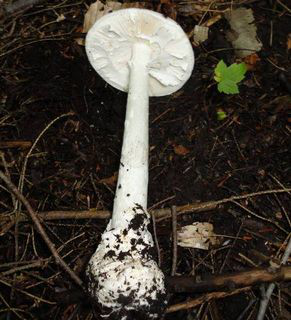

In [52]:
# 원본 이미지
none_trans[0][0]

In [54]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
print('학습을 진행하는 기기:', device) # cuda가 나온다면 GPU 사용이 가능한 것

학습을 진행하는 기기: cuda


In [55]:
# pre-trained model 불러오기
# 이미지 분류 문제를 해결할 수 있도록 규모가 큰 데이터로 미리 학습된 모델
model = models.resnet152(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [56]:
# Freeze network
for param in model.parameters():
    param.requires_grad = False

# 순서를 갖는 모듈의 컨테이너
# 정의된 것과 같은 순서로 모든 모듈들을 통해 전달 -> 신경망을 빠르게 제작
# 참고: https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html
# nn.Linear(input_dim, output_dim)
# nn.ReLu() - 선형 변환 후에 적용되어 비선형성을 도입
# nn.Dropout() - dropout layer를 추가
# nn.LogSoftmax - 신경망의 마지막 선형 계층을 전달받아 logits을 반환
num_classes = 12
# num_ftrs = model.fc.in_features


model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),
                                 nn.Linear(512, num_classes),
                                 nn.LogSoftmax(dim=1)
                                )
criterion = torch.nn.CrossEntropyLoss()
# # >>>>>>>>>>> hyperparameter - learning rate <<<<<<<<<<<<
# optimizer = optim.Adam(model.fc.parameters(), lr=0.002, weight_decay=0.0)
# scheduler = optim.lr_scheduler.LambdaLR(optimizer, lambda epoch: 0.9 ** epoch)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode='min', patience=3)
model.to(device) # NeuralNetwork의 인스턴스를 생성하고 이를 device로 이동한 뒤, 구조를 출력

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [57]:
# >>>>>>>>>>> hyperparameter - epoch <<<<<<<<<<<<
epochs = 30
steps = 0
running_loss = 0
print_every = 10
train_losses, test_losses, accuracies = [], [], []
for epoch in range(epochs):
    print(f'lr: {optimizer.param_groups[0]["lr"]}')
    
    for inputs, labels in trainloader:
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    test_loss += batch_loss.item()
                    
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    train_losses.append(running_loss/len(trainloader))
                    test_losses.append(test_loss/len(testloader)) 
                    accuracies.append(accuracy/len(testloader))

            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()
    print('\n')
    scheduler.step(test_loss)
torch.save(model, 'aerialmodel.pth')

lr: 0.01
Epoch 1/30.. Train loss: 2.045.. Test loss: 1.601.. Test accuracy: 0.595


lr: 0.01
Epoch 2/30.. Train loss: 1.472.. Test loss: 1.209.. Test accuracy: 0.649
Epoch 2/30.. Train loss: 1.064.. Test loss: 0.826.. Test accuracy: 0.721


lr: 0.01
Epoch 3/30.. Train loss: 0.720.. Test loss: 0.595.. Test accuracy: 0.801
Epoch 3/30.. Train loss: 0.568.. Test loss: 0.472.. Test accuracy: 0.850


lr: 0.01
Epoch 4/30.. Train loss: 0.464.. Test loss: 0.418.. Test accuracy: 0.859
Epoch 4/30.. Train loss: 0.428.. Test loss: 0.378.. Test accuracy: 0.871


lr: 0.01
Epoch 5/30.. Train loss: 0.382.. Test loss: 0.334.. Test accuracy: 0.887
Epoch 5/30.. Train loss: 0.344.. Test loss: 0.321.. Test accuracy: 0.889


lr: 0.01
Epoch 6/30.. Train loss: 0.350.. Test loss: 0.306.. Test accuracy: 0.894
Epoch 6/30.. Train loss: 0.338.. Test loss: 0.291.. Test accuracy: 0.904


lr: 0.01
Epoch 7/30.. Train loss: 0.306.. Test loss: 0.305.. Test accuracy: 0.897
Epoch 7/30.. Train loss: 0.301.. Test loss: 0.301

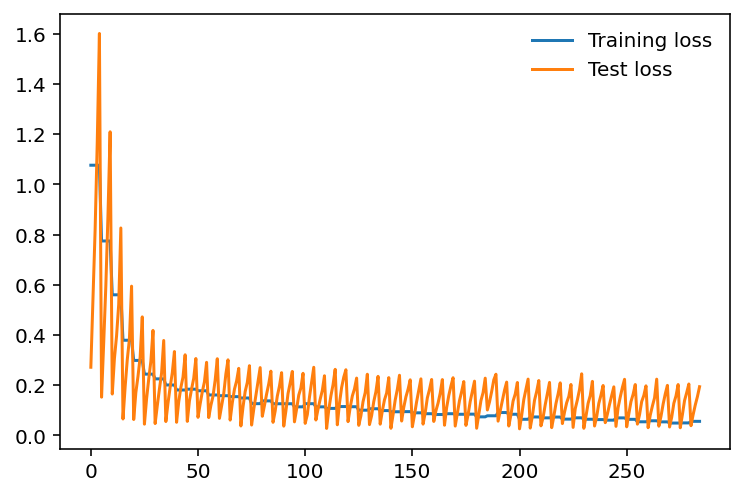

In [59]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend(frameon=False)
plt.show()

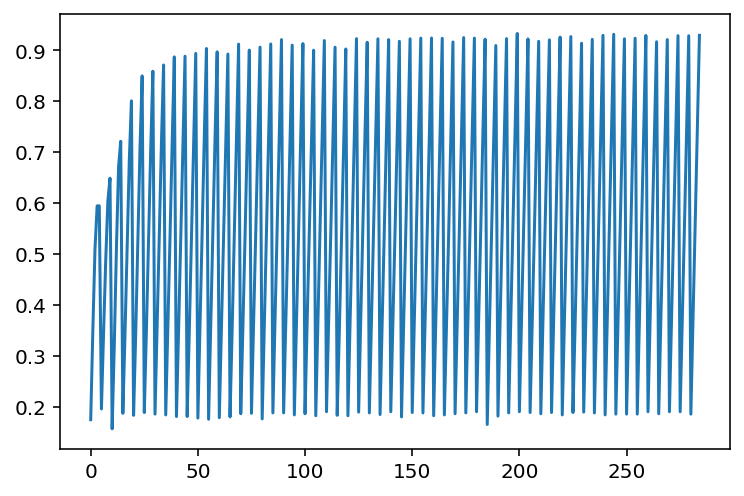

In [60]:
plt.plot(accuracies, label='Accuracy')
plt.show()

In [61]:
test_dir = "/content/test/"
test_transforms = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [62]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=torch.load('aerialmodel.pth')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [63]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = image_tensor
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

In [64]:
def get_random_images(num):
    data = datasets.ImageFolder(test_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, 
                   sampler=sampler, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

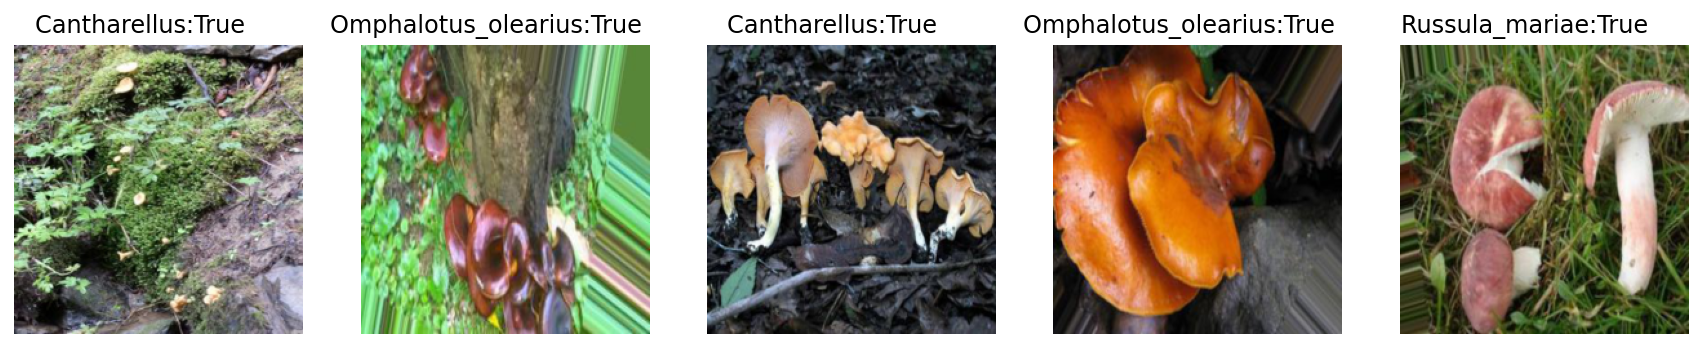

In [90]:
classes = trainloader.dataset.classes
to_pil = transforms.ToPILImage()
images, labels = get_random_images(5)
fig=plt.figure(figsize=(15,15))
for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    sub.set_title(str(classes[index]) + ":" + str(res) + "     ")
    plt.axis('off')
    plt.imshow(image)
plt.show()